In [1]:
import sys
import os
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *
from GWGen.Utils import *

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.fft

from astropy.units import yr,s
SecPerYR = yr.to(s)

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *
traj = PNTraj()
traj.dense_output=False

In [2]:
# set initial parameters
M = 1e5
m = 1e1
mu = 1e-16
a = 0.9
e0=0.2
p0=GetInitialP(M,e0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.

a=0.9 #SMBH Spin
Y0=1. #Initial Inclincation
qS=np.pi/4 #Sky Location Polar Angle in solar system barycenter coordinate system
phiS=0. #Sky Location Azimuthal Angle in solar system barycenter coordinate system
qK=1e-6 #Initial BH Spin Polar Angle in solar system barycenter coordinate system
phiK=0. #Initial BH Spin Azimuthal Angle in solar system barycenter coordinate system
dist=1. #Distance to source (Mpc)
mich=False #assume LISA long baseline response approximation

T=8 #LISA data run is 5 years. We set the max time to be longer because the proca cloud extends the inspiral time
dt=15 #time resolution in seconds

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))
print("initial p = {0}".format(p0))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "npoints": 100,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "dense_output":True
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

pc = ProcaSolution(M,a,mu)

alpha = 0.07483138061572224
initial p = 34.95
UltralightBoson instance not provided. Instantiating class...
done.


# With Proca

In [3]:
OrbitalConstantsChange = pc.ChangeInOrbitalConstants(SecondaryMass=m, SMBHMass=M)
ProcaInspiralKwargs = inspiral_kwargs.copy()
ProcaInspiralKwargs["DeltaEFlux"] = OrbitalConstantsChange["E"]
ProcaInspiralKwargs["DeltaLFlux"] = OrbitalConstantsChange["L"]
ProcaInspiralKwargs["FluxName"] = 'analytic'
tp,pp,ep,xp,phiphip,phithetap,phirp = traj(M,m,a, p0,e0,Y0,T=T, **ProcaInspiralKwargs)
traj.exit_reason

'Separatrix reached!'

# Without Proca

In [4]:
inspiralKwargs=inspiral_kwargs.copy()
t,p,e,x,phiphi,phitheta,phir = traj(M,m,a, p0,e0,Y0,T=T,**inspiralKwargs)

# Plot

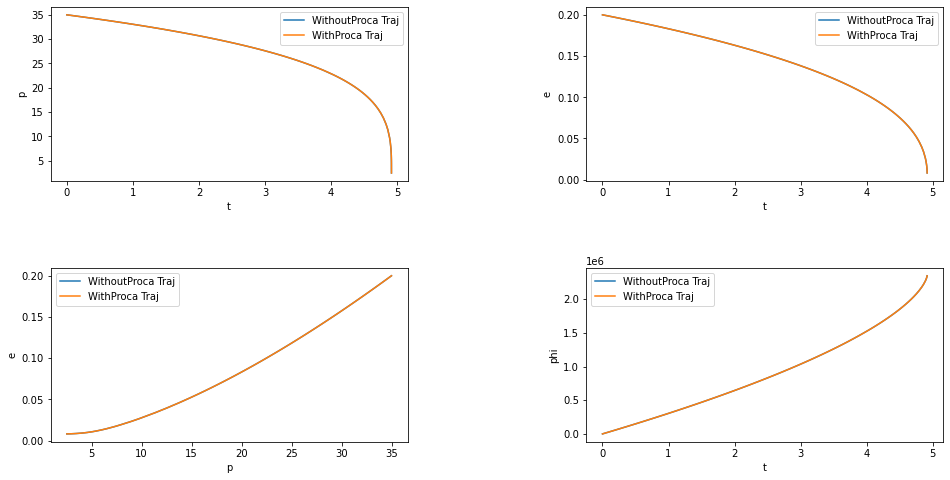

In [5]:
fig,ax = plt.subplots(2,2, figsize=(16,8))

plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.set_size_inches(16, 8)
ax[0,0].plot(t/SecPerYR,p, label="WithoutProca Traj")
ax[0,0].set_xlabel("t")
ax[0,0].set_ylabel("p")
ax[0,0].plot(tp/SecPerYR,pp, label="WithProca Traj")
ax[0,0].legend()

ax[0,1].plot(t/SecPerYR,e, label="WithoutProca Traj")
ax[0,1].set_xlabel("t")
ax[0,1].set_ylabel("e")
ax[0,1].plot(tp/SecPerYR,ep, label="WithProca Traj")
ax[0,1].legend()

ax[1,0].plot(p,e, label="WithoutProca Traj")
ax[1,0].set_xlabel("p")
ax[1,0].set_ylabel("e")
ax[1,0].plot(pp,ep, label="WithProca Traj")
ax[1,0].legend()

ax[1,1].plot(t/SecPerYR,phiphi, label="WithoutProca Traj")
ax[1,1].set_xlabel("t")
ax[1,1].set_ylabel("phi")
ax[1,1].plot(tp/SecPerYR,phiphip, label="WithProca Traj")
ax[1,1].legend();